Load the data

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from google.colab import files

In [ ]:
import pandas as pd
data = pd.read_csv("HANDS.csv", skiprows=3)

Data Cleaning

In [ ]:
column_names = [
    "Index", "Cycle", "Disaster Year", "Disaster Type", "Response/Recovery",
    "Project Owner", "Consortium member", "Implementing agency", "Supplying agency",
    "Province", "District", "Tehsil", "Union council", "UC codes", "Village", "Multisector overlap",
    "Activity Sector", "Activity", "Activity description", "Unit cost", "Activity unit", "Activity target", "Activity achieved",
    "Activity status", "Activity status description", "Start date", "End date",
    "Beneficiary unit", "Beneficiary Target", "Beneficiaries Reached", "0 - 5 (M)", "0 - 5 (F)",
    "6 - 17 (M)", "6 - 17 (F)", "18 - 40 (M)", "18 - 40 (F)", "41 - 59 (M)", "41 - 59 (F)", "60+ (M)", "60+ (F)",
    "Total Males", "Total Females", "Total Population", "Female Headed Households",
    "Child (0-17) Headed Households", "Disabled Individuals", "Elderly Headed HHs", "Diseased/Chronically Ill HH",
    "Disabled HH", "<6000 PKR", "Agency Comments", "Reporting Agency Contact Person Name", "Contact Number", "E-mail", "faiza"
]
data.columns = column_names
data.head()

,Index,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,...,Disabled Individuals,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR,Agency Comments,Reporting Agency Contact Person Name,Contact Number,E-mail,faiza
0,1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,...,10,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,NaN,NaN,NaN,NaN,HANDS updated records for 'year2 pending shelt...
1,2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,...,57,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,NaN,NaN,NaN,NaN,HANDS updated records for 'year2 pending shelt...
2,3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,...,0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,NaN,NaN,NaN,NaN,HANDS updated records for 'year2 pending shelt...
3,4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,...,26,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,NaN,NaN,NaN,NaN,HANDS updated records for 'year2 pending shelt...
4,5,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,...,14,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,NaN,NaN,NaN,NaN,HANDS updated records for 'year2 pending shelt...


In [ ]:
data = data.drop_duplicates()
num_duplicates = len(data[data.duplicated()])
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [ ]:
empty_rows_per_column = data.isna().sum()
print("Number of empty rows in each column:")
print(empty_rows_per_column)

Number of empty rows in each column:
Index                                       0
Cycle                                       0
Disaster Year                               0
Disaster Type                               0
Response/Recovery                           0
Project Owner                               0
Consortium member                           0
Implementing agency                         0
Supplying agency                            0
Province                                    0
District                                    0
Tehsil                                      0
Union council                               0
UC codes                                 4788
Village                                    12
Multisector overlap                      4148
Activity Sector                             0
Activity                                    0
Activity description                        0
Unit cost                                  39
Activity unit                              

In [ ]:
drop = ["Index", "Agency Comments", "Reporting Agency Contact Person Name", "Contact Number", "E-mail", "faiza", "UC codes", "Multisector overlap", "Activity status description", "Disabled Individuals", "Agency Comments"]
data_clean = data.drop(columns=drop)
data_clean

,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,District,...,60+ (F),Total Males,Total Females,Total Population,Female Headed Households,Child (0-17) Headed Households,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR
0,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,99.0,97.0,196.0,12.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,164.0,142.0,306.0,27.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,1.0,6.0,7.0,1.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,95.0,93.0,188.0,19.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,47.0,66.0,113.0,4.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,4.0,4.0,8.0,0.0,0.0,0,0,0,0
10329,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10330,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10331,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,6.0,2.0,8.0,0.0,0.0,0,0,0,0


In [ ]:
threshold = 3
datadf = data_clean.dropna(thresh=threshold)
datadf

,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,District,...,60+ (F),Total Males,Total Females,Total Population,Female Headed Households,Child (0-17) Headed Households,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR
0,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,99.0,97.0,196.0,12.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,164.0,142.0,306.0,27.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,1.0,6.0,7.0,1.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,95.0,93.0,188.0,19.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,47.0,66.0,113.0,4.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,4.0,4.0,8.0,0.0,0.0,0,0,0,0
10329,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10330,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10331,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,6.0,2.0,8.0,0.0,0.0,0,0,0,0


In [ ]:
data_clean = datadf.dropna()
datadf

,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,District,...,60+ (F),Total Males,Total Females,Total Population,Female Headed Households,Child (0-17) Headed Households,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR
0,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,99.0,97.0,196.0,12.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,164.0,142.0,306.0,27.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,1.0,6.0,7.0,1.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,95.0,93.0,188.0,19.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,47.0,66.0,113.0,4.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,4.0,4.0,8.0,0.0,0.0,0,0,0,0
10329,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10330,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10331,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,6.0,2.0,8.0,0.0,0.0,0,0,0,0


In [ ]:
null_rows = datadf.isna().any(axis=1)
rows_with_nulls = datadf[null_rows]
datadf_clean = datadf.dropna()
datadf_clean


,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,District,...,60+ (F),Total Males,Total Females,Total Population,Female Headed Households,Child (0-17) Headed Households,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR
0,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,99.0,97.0,196.0,12.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,164.0,142.0,306.0,27.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,1.0,6.0,7.0,1.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,95.0,93.0,188.0,19.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,missing,47.0,66.0,113.0,4.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,4.0,4.0,8.0,0.0,0.0,0,0,0,0
10329,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10330,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,3.0,4.0,7.0,0.0,0.0,0,0,0,0
10331,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,0,6.0,2.0,8.0,0.0,0.0,0,0,0,0


<ipython-input-12-340ff3825451>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean[col] = pd.to_numeric(datadf_clean[col], errors='coerce')


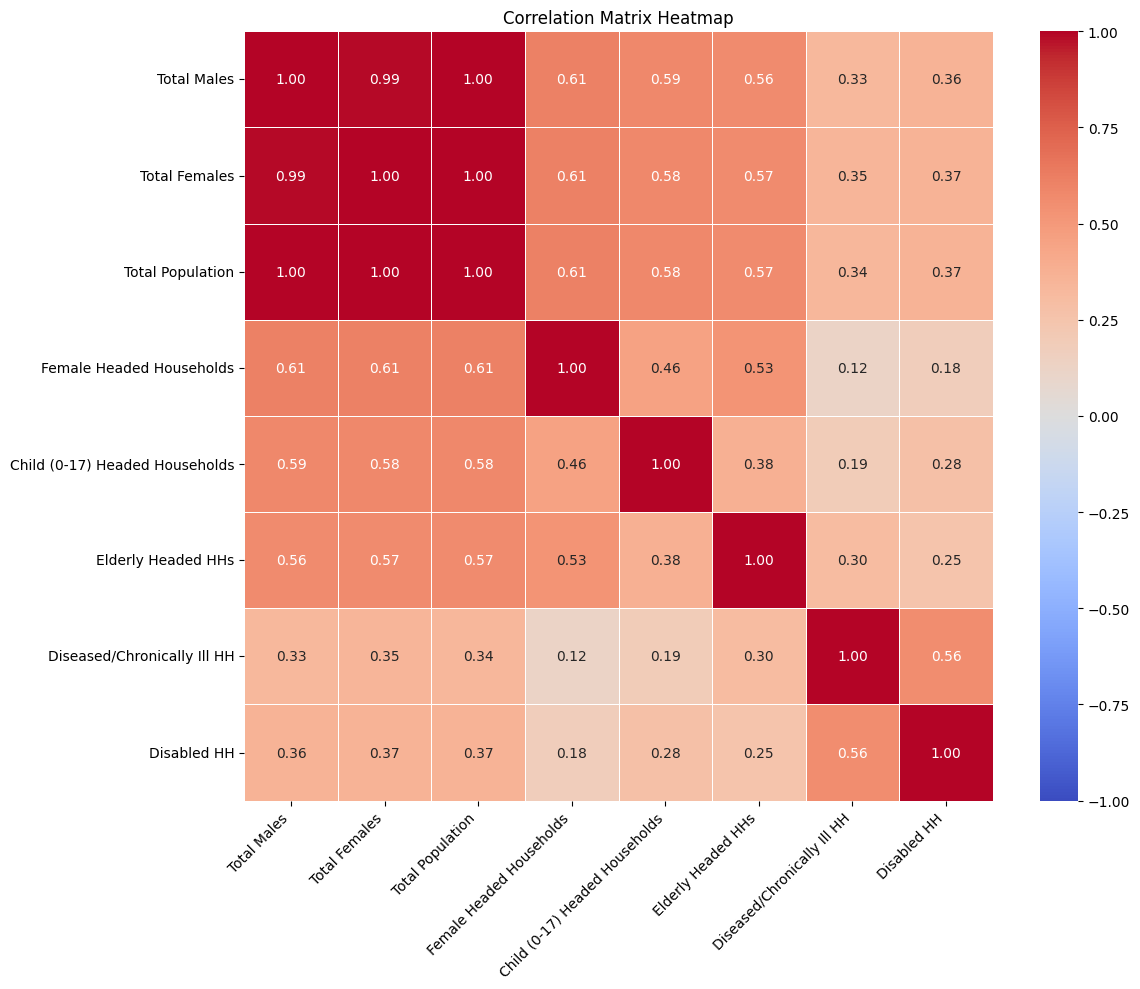

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame loading (replace with your actual data loading if needed)
# datadf_clean = pd.read_csv('your_data.csv')

# Convert relevant columns to numeric, forcing errors to NaN for non-numeric values
numeric_columns = [
    'Total Males', 'Total Females', 'Total Population',
    'Female Headed Households', 'Child (0-17) Headed Households',
    'Elderly Headed HHs', 'Diseased/Chronically Ill HH', 'Disabled HH'
]

for col in numeric_columns:
    datadf_clean[col] = pd.to_numeric(datadf_clean[col], errors='coerce')

# Drop rows with NaN values in numeric columns if necessary
datadf_clean = datadf_clean.dropna(subset=numeric_columns)

# Compute the correlation matrix
correlation_matrix = datadf_clean[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Frequency of different disaster types
disaster_type_counts = datadf_clean['Disaster Type'].value_counts()
print("Frequency of Disaster Types:")
disaster_type_counts

# Count of Response/Recovery actions per disaster type
response_recovery_counts = datadf_clean.groupby(['Disaster Type', 'Response/Recovery']).size()
print("\nResponse/Recovery actions per Disaster Type:")
response_recovery_counts


Frequency of Disaster Types:

Response/Recovery actions per Disaster Type:


Disaster Type  Response/Recovery 
Drought        Emergency Response     705
EQ             Early Recovery         541
Earthquake     Early Recovery          91
Floods         Early Recovery         649
Floods         Early Recovery         764
               Emergency Response    1161
dtype: int64

In [ ]:
# Distribution across districts
district_distribution = datadf_clean['District'].value_counts()
print("\nDistribution of Projects/Responses by District:")
district_distribution


Distribution of Projects/Responses by District:


,count
District,
Layyah,744
Killa Abdullah,717
Shangla,632
Sujawal,408
Nushki,369
Umerkot,318
Dadu,282
Thatta,261
Killa Saifullah,180


In [ ]:
# Count of Female Headed Households
female_headed_households = datadf_clean['Female Headed Households'].sum()
print("Total Female Headed Households:", female_headed_households)

# Count of Child Headed Households
child_headed_households = datadf_clean['Child (0-17) Headed Households'].sum()
print("Total Child (0-17) Headed Households:", child_headed_households)

Total Female Headed Households: 9173.0
Total Child (0-17) Headed Households: 808.0


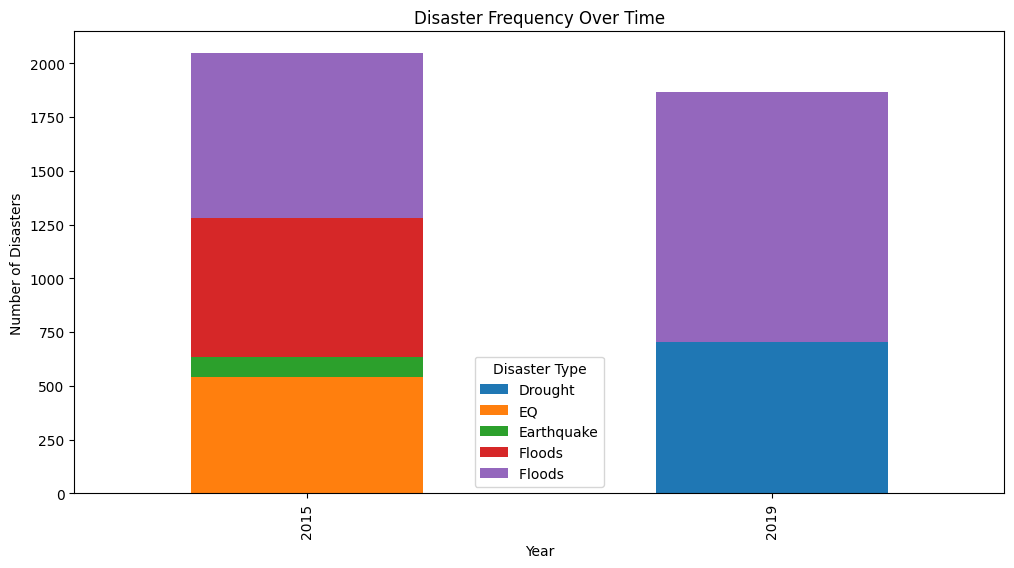

In [ ]:
disaster_trend = datadf_clean.groupby(['Disaster Year', 'Disaster Type']).size().unstack(fill_value=0)
disaster_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Disaster Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.show()

In [ ]:
project_owner_distribution = datadf_clean['Project Owner'].value_counts()
print("Distribution of Projects by Project Owner:")
project_owner_distribution

Distribution of Projects by Project Owner:


,count
Project Owner,
IOM,3911


In [ ]:
implementing_agency_counts = datadf_clean['Implementing agency'].value_counts()
supplying_agency_counts = datadf_clean['Supplying agency'].value_counts()
print("\nImplementing Agencies Distribution:")
implementing_agency_counts
print("\nSupplying Agencies Distribution:")
supplying_agency_counts


Implementing Agencies Distribution:

Supplying Agencies Distribution:


,count
Supplying agency,
HANDS,2045
HANDS (itself),1539
ACTED,239
IOM,88


In [ ]:
unique_provinces = datadf_clean['Province'].unique()
print("Unique Provinces:")
print(unique_provinces)


Unique Provinces:
['Sindh' 'Punjab' 'Khyber Pakhtunkhwa' 'Baluchistan']


In [ ]:
unique_provinces = datadf_clean['Province'].unique()
print("Unique Provinces:")
print(unique_provinces)


Unique Provinces:
['Sindh' 'Punjab' 'Khyber Pakhtunkhwa' 'Baluchistan']


In [ ]:
province_counts = datadf_clean['Province'].value_counts()
print("Province Counts:")
print(province_counts)

Province Counts:
Province
Sindh                 1269
Baluchistan           1266
Punjab                 744
Khyber Pakhtunkhwa     632
Name: count, dtype: int64


In [ ]:
# Remove leading and trailing whitespace from the 'Disaster Type' column
datadf_clean['Disaster Type'] = datadf_clean['Disaster Type'].str.strip()
disaster = datadf_clean['Disaster Type'].unique()
print("Unique Disaster Types after cleaning:")
disaster

Unique Disaster Types after cleaning:


<ipython-input-22-52c820f835a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean['Disaster Type'] = datadf_clean['Disaster Type'].str.strip()


array(['Floods', 'EQ', 'Earthquake', 'Drought'], dtype=object)

Count of Each Disaster Type per Province:
Disaster Type       Drought   EQ  Earthquake  Floods
Province                                            
Baluchistan             105    0           0    1161
Khyber Pakhtunkhwa        0  541          91       0
Punjab                    0    0           0     744
Sindh                   600    0           0     669

Proportion of Disaster Types in Each Province (%):
Disaster Type         Drought         EQ  Earthquake      Floods
Province                                                        
Baluchistan          8.293839   0.000000    0.000000   91.706161
Khyber Pakhtunkhwa   0.000000  85.601266   14.398734    0.000000
Punjab               0.000000   0.000000    0.000000  100.000000
Sindh               47.281324   0.000000    0.000000   52.718676


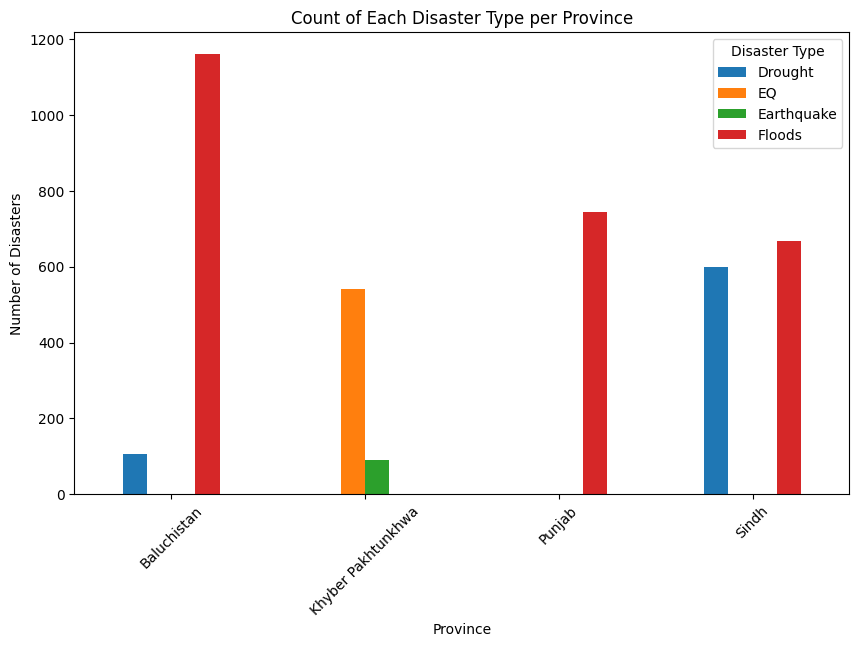

In [ ]:
# Count of each disaster type per province
disaster_type_per_province = datadf_clean.groupby('Province')['Disaster Type'].value_counts().unstack(fill_value=0)
print("Count of Each Disaster Type per Province:")
print(disaster_type_per_province)

# Proportion of each disaster type within each province
proportion_disaster_type_per_province = disaster_type_per_province.div(disaster_type_per_province.sum(axis=1), axis=0) * 100
print("\nProportion of Disaster Types in Each Province (%):")
print(proportion_disaster_type_per_province)

# Plotting the count of each disaster type per province
disaster_type_per_province.plot(kind='bar', figsize=(10, 6))
plt.title("Count of Each Disaster Type per Province")
plt.xlabel("Province")
plt.ylabel("Number of Disasters")
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-bc51400f2c90>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean[column] = pd.to_numeric(datadf_clean[column], errors='coerce').fillna(0)


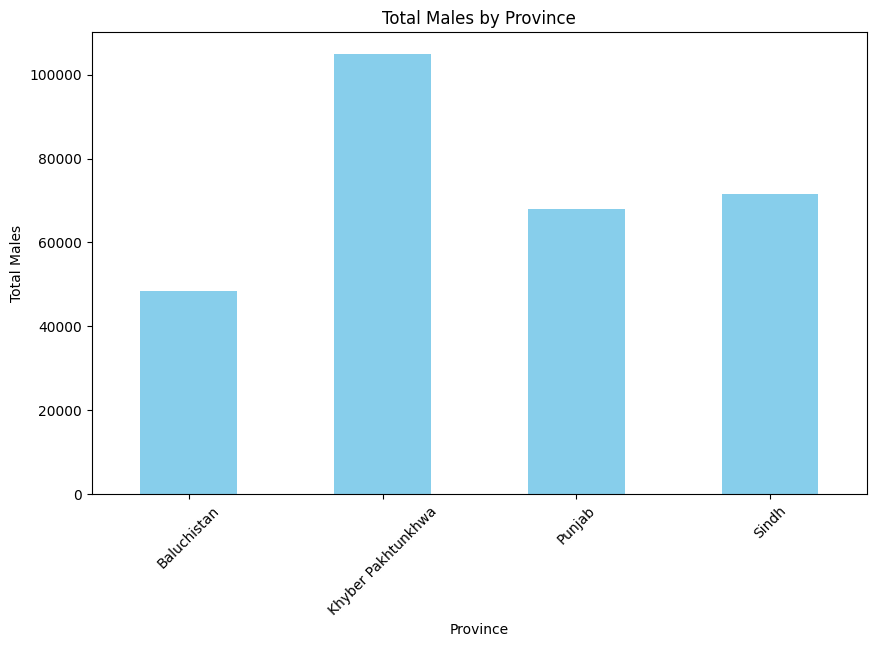

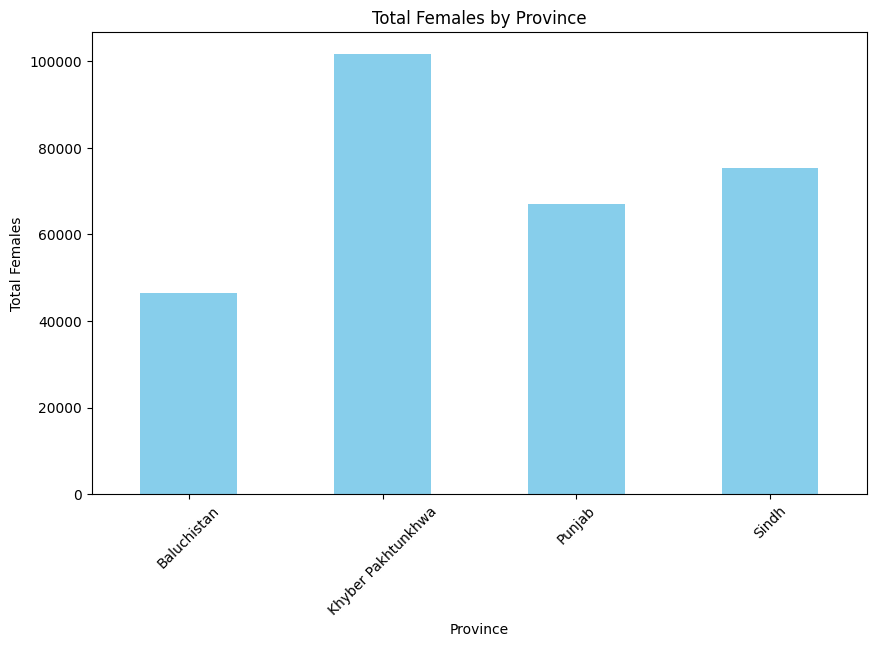

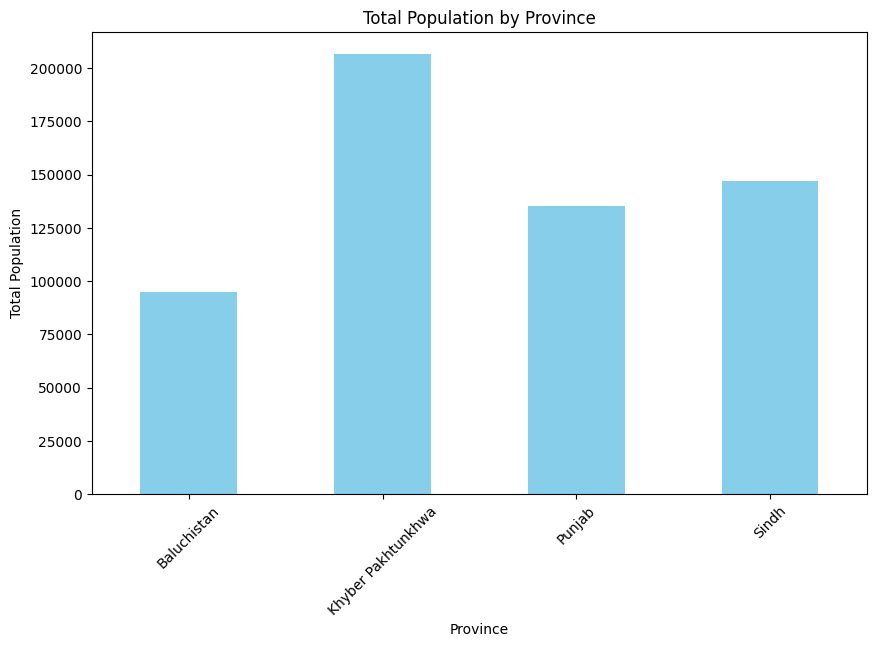

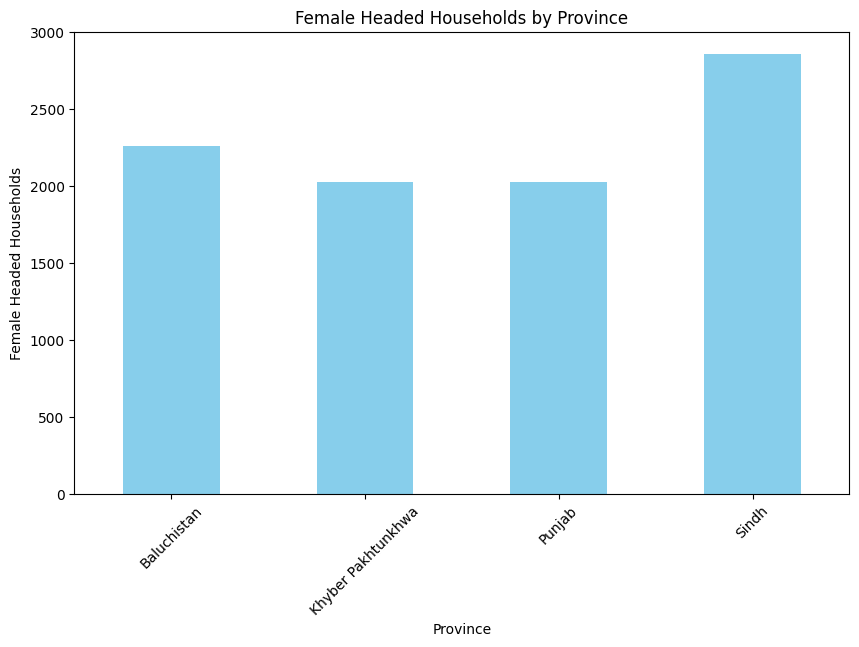

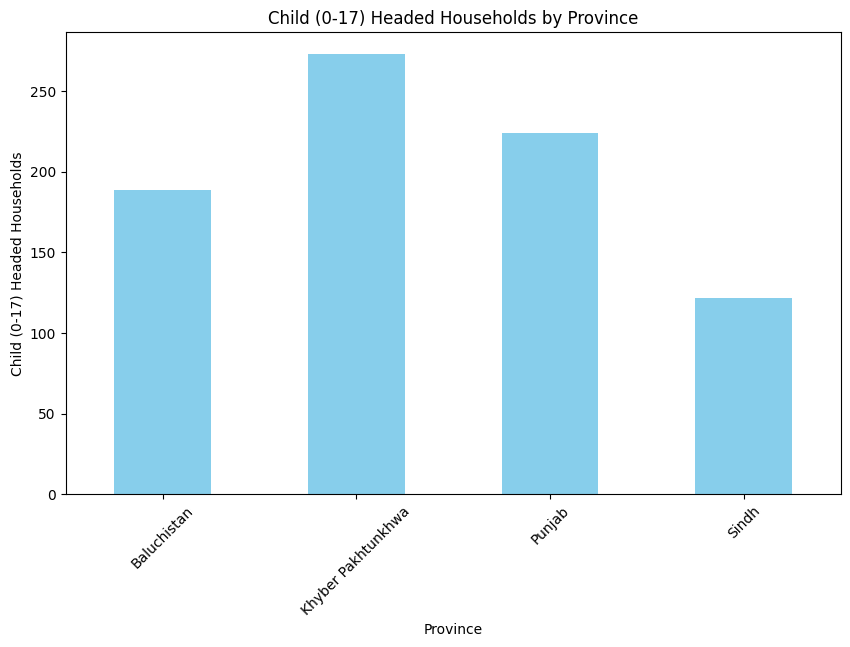

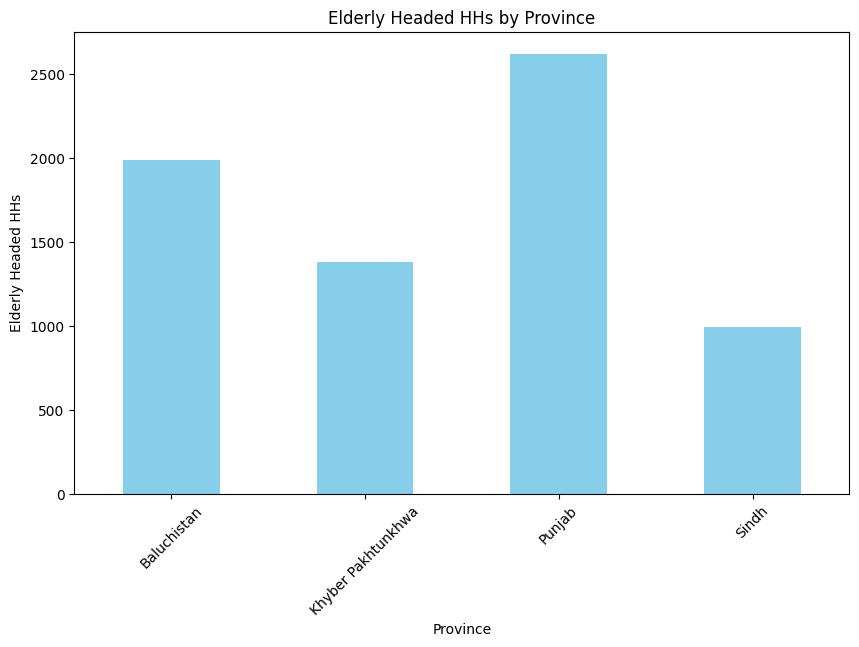

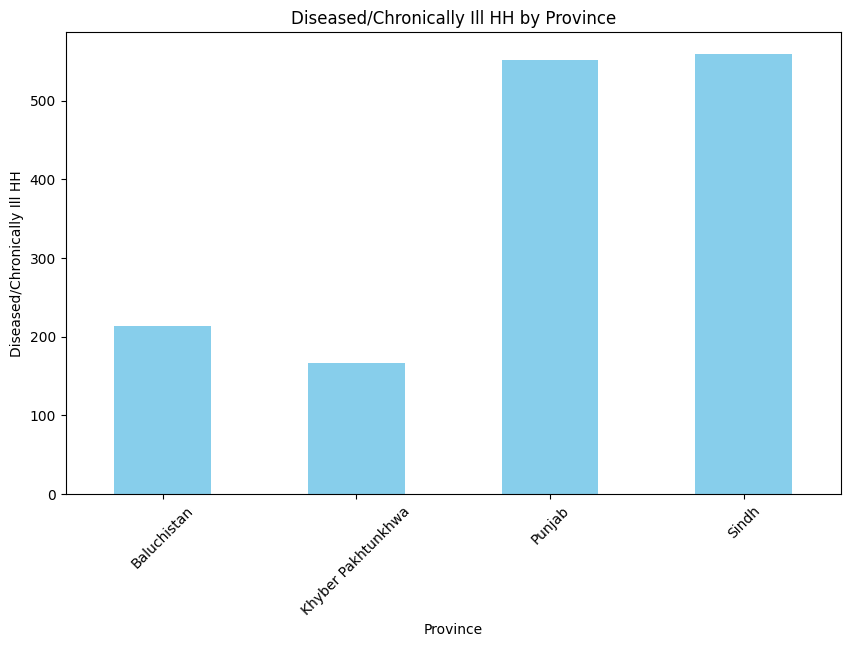

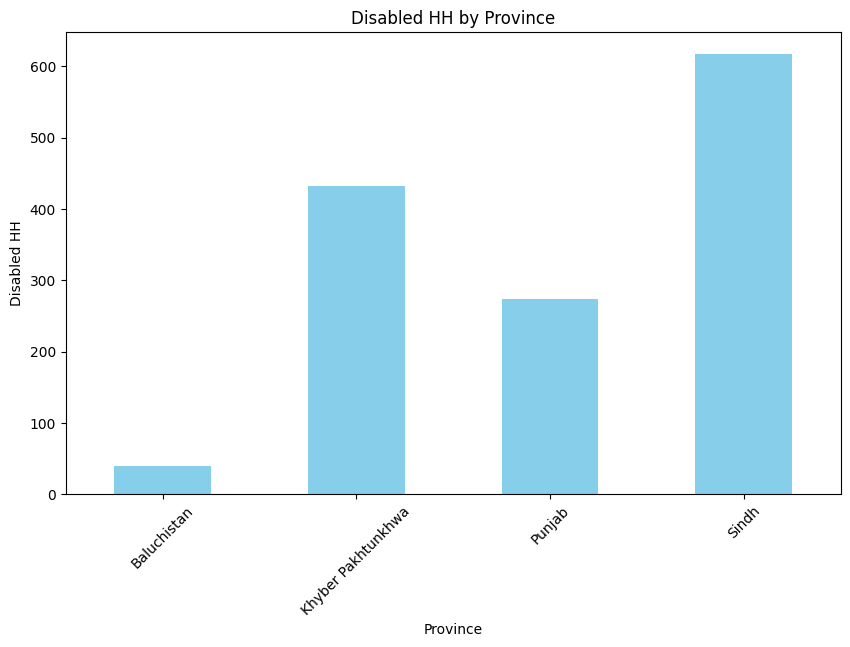

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming datadf_clean is your DataFrame

# List of demographic columns to clean and visualize
demographic_columns = [
    'Total Males', 'Total Females', 'Total Population',
    'Female Headed Households', 'Child (0-17) Headed Households',
    'Elderly Headed HHs', 'Diseased/Chronically Ill HH', 'Disabled HH'
]

# Convert specified columns to numeric, replacing errors with NaN, then fill NaN with 0
for column in demographic_columns:
    datadf_clean[column] = pd.to_numeric(datadf_clean[column], errors='coerce').fillna(0)

# Group by 'Province' and sum the demographic indicators
province_demographics = datadf_clean.groupby('Province')[demographic_columns].sum()

# Create Bar Charts
for column in demographic_columns:
    plt.figure(figsize=(10, 6))
    province_demographics[column].plot(kind='bar', color='skyblue')
    plt.title(f"{column} by Province")
    plt.xlabel("Province")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()


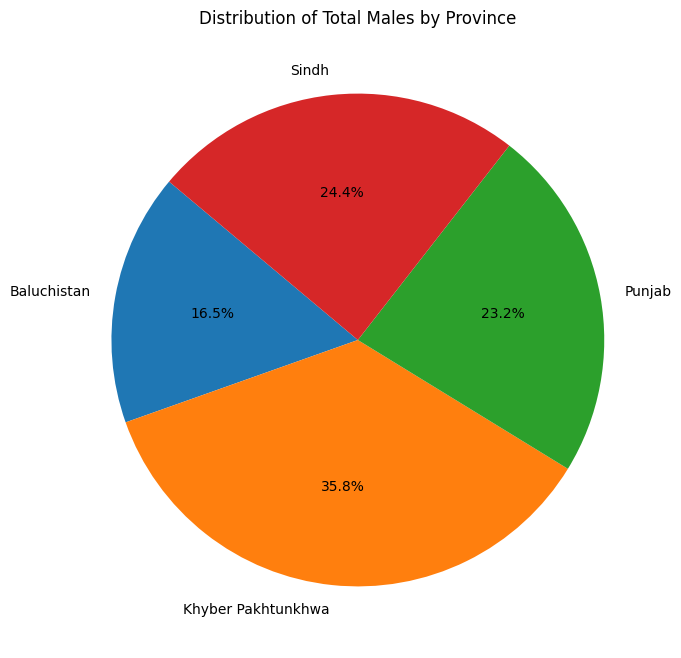

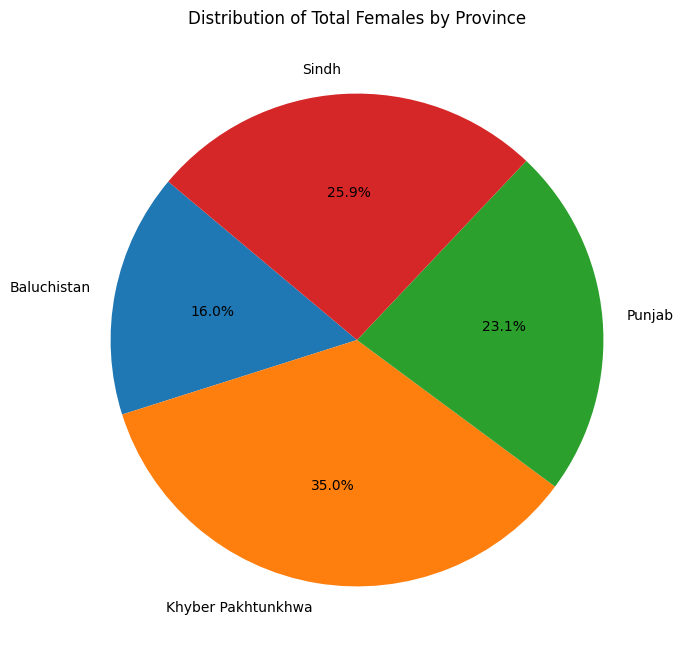

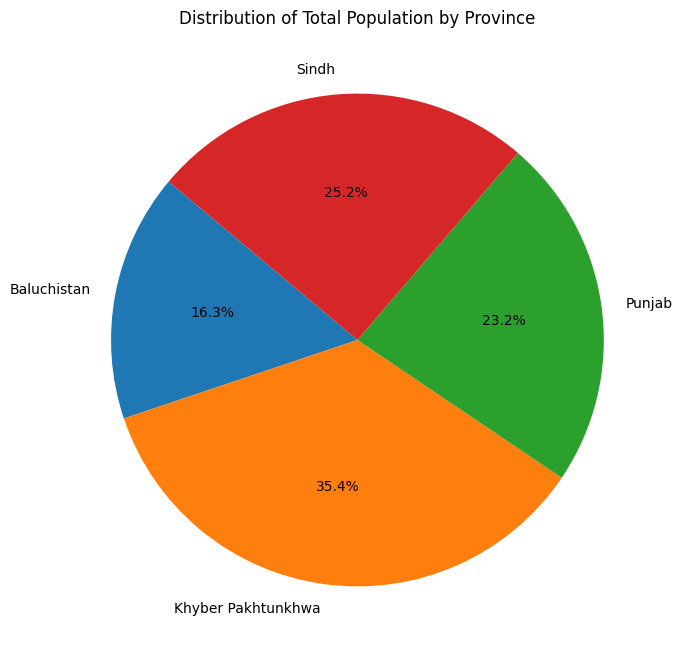

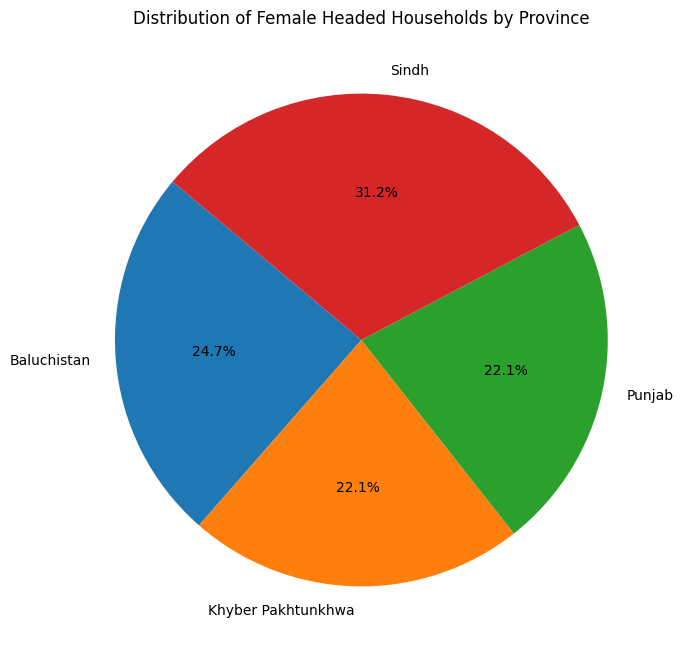

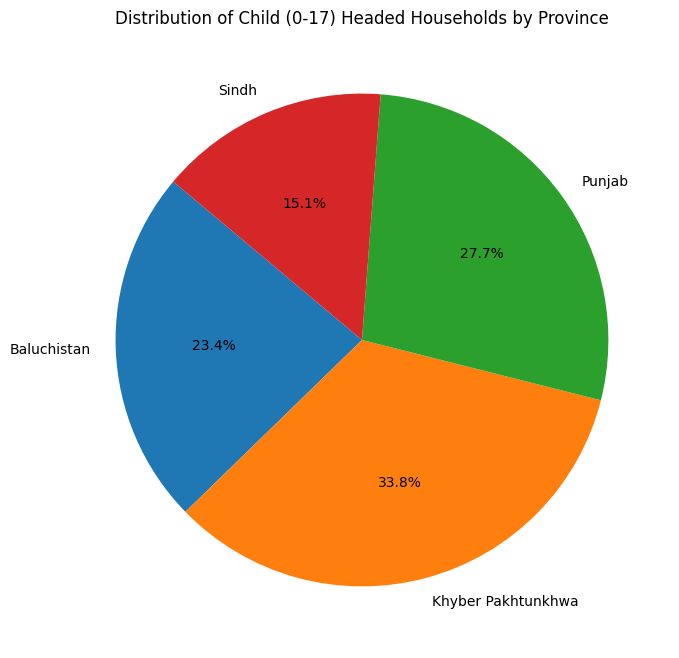

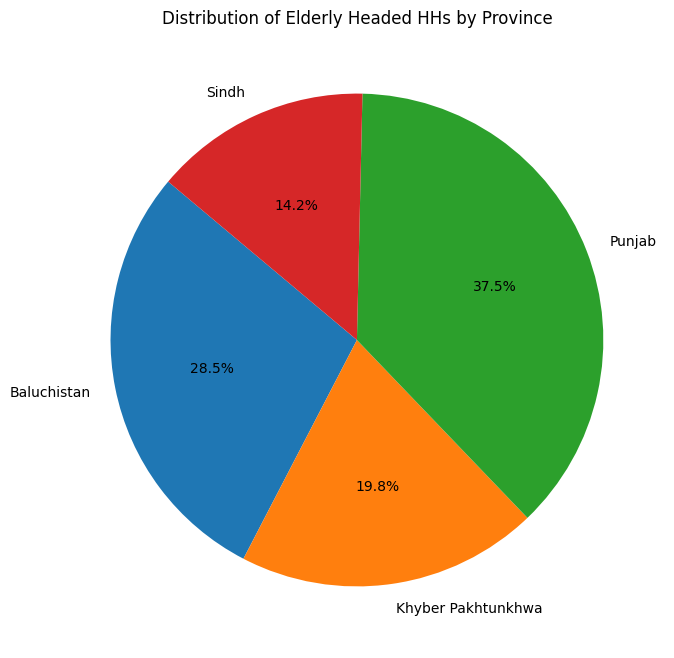

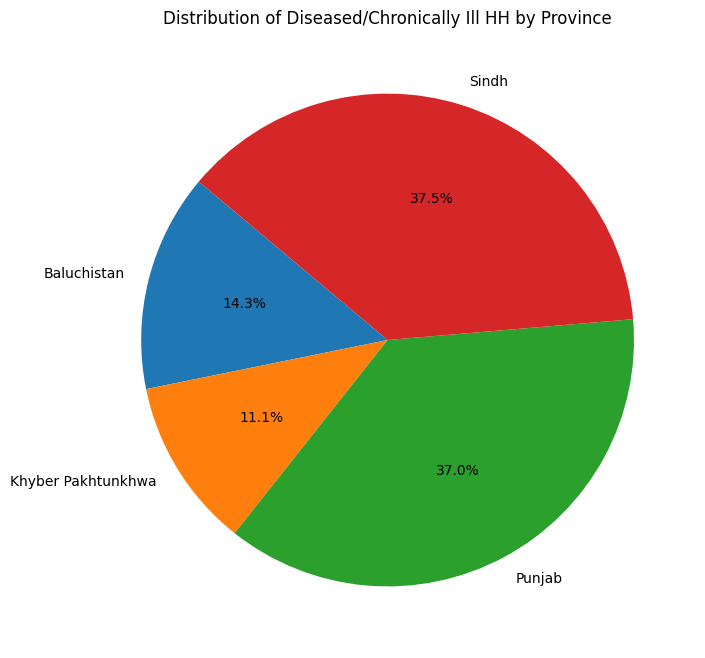

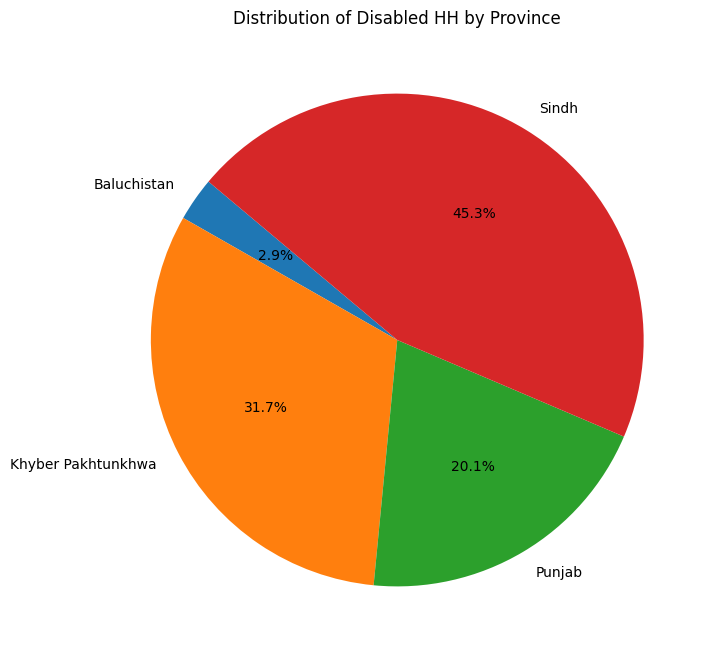

In [ ]:
# Create Pie Charts
for column in demographic_columns:
    # Summarize total for each demographic across all provinces
    total_demographic = province_demographics[column].sum()

    # Prepare data for pie chart
    pie_data = province_demographics[column]
    labels = pie_data.index
    sizes = pie_data.values

    # Plot Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of {column} by Province")
    plt.show()


<ipython-input-26-957b04148f4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean['Cycle'] = datadf_clean['Cycle'].astype('category')
<ipython-input-26-957b04148f4b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean['Disaster Type'] = datadf_clean['Disaster Type'].astype('category')
<ipython-input-26-957b04148f4b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

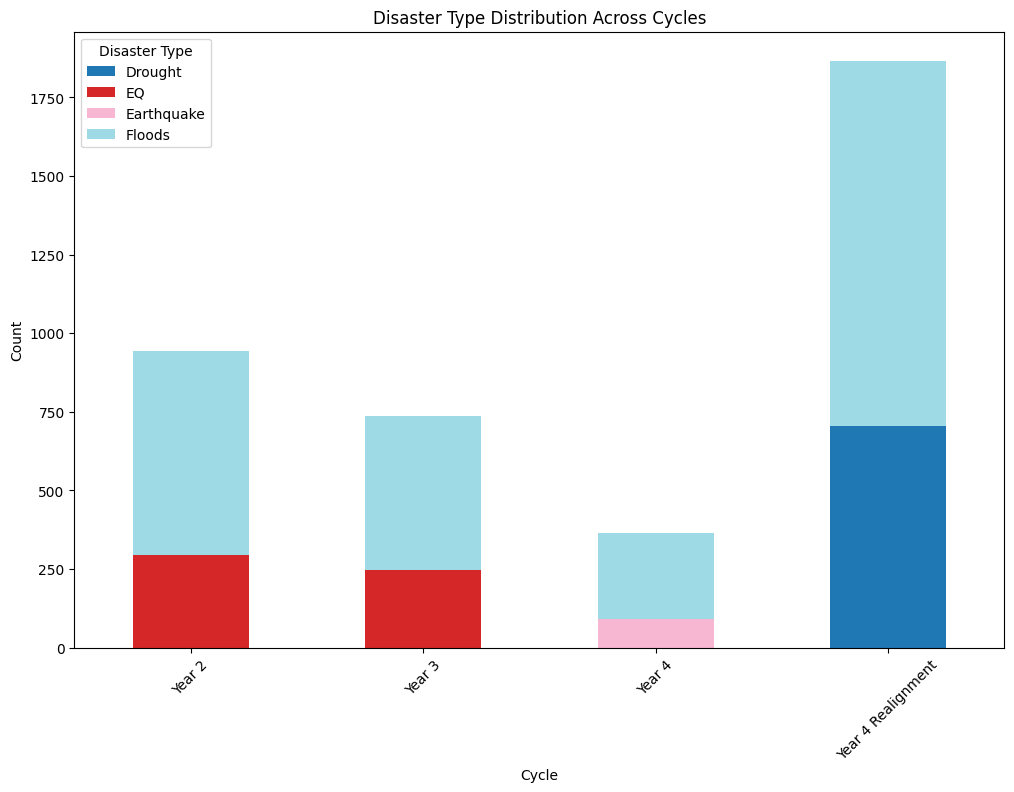

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming datadf_clean is your DataFrame

# Convert relevant columns to categorical types
datadf_clean['Cycle'] = datadf_clean['Cycle'].astype('category')
datadf_clean['Disaster Type'] = datadf_clean['Disaster Type'].astype('category')
datadf_clean['Response/Recovery'] = datadf_clean['Response/Recovery'].astype('category')

# Group by 'Cycle' and 'Disaster Type' and count occurrences
cycle_disaster_counts = datadf_clean.groupby(['Cycle', 'Disaster Type']).size().unstack().fillna(0)

# Plot Bar Chart
cycle_disaster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Disaster Type Distribution Across Cycles')
plt.xlabel('Cycle')
plt.ylabel('Count')
plt.legend(title='Disaster Type')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-e3db1ca16c23>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cycle_response_counts = datadf_clean.groupby(['Cycle', 'Response/Recovery']).size().unstack().fillna(0)


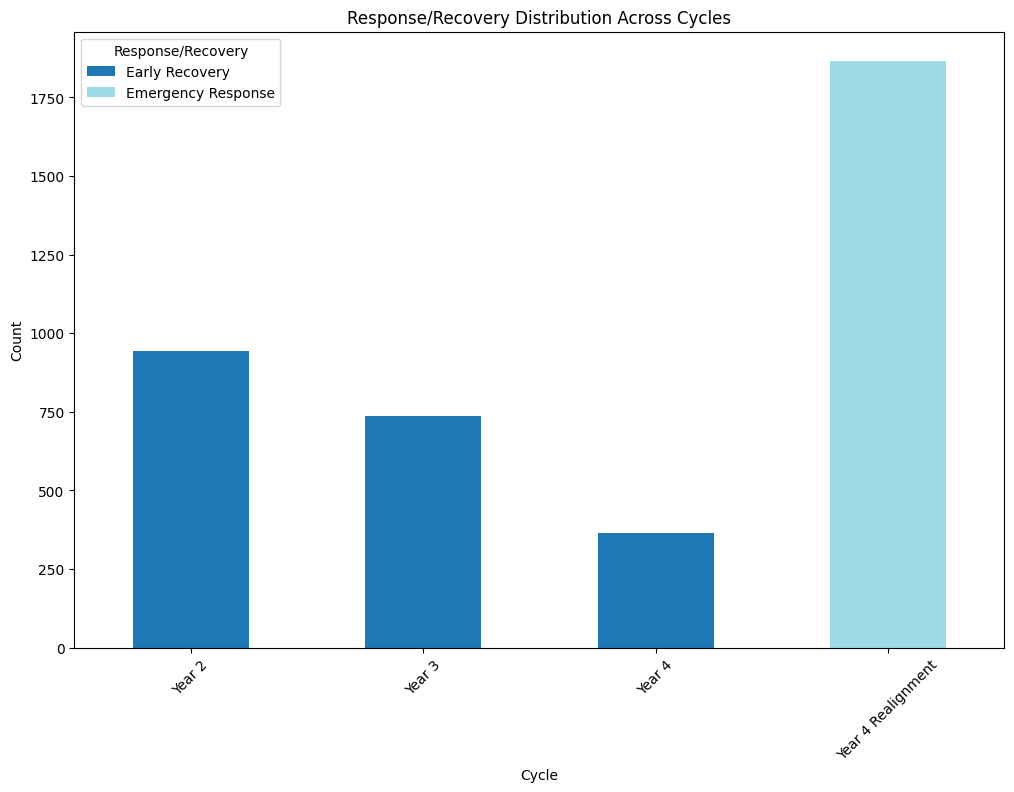

In [ ]:
# Group by 'Cycle' and 'Response/Recovery' and count occurrences
cycle_response_counts = datadf_clean.groupby(['Cycle', 'Response/Recovery']).size().unstack().fillna(0)

# Plot Bar Chart
cycle_response_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Response/Recovery Distribution Across Cycles')
plt.xlabel('Cycle')
plt.ylabel('Count')
plt.legend(title='Response/Recovery')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(datadf_clean['Cycle'], datadf_clean['Disaster Type'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Cycle and Disaster Type.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Cycle and Disaster Type.")


Chi2 Statistic: 2386.5310804850415
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between Cycle and Disaster Type.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode 'Disaster Type'
le = LabelEncoder()
datadf_clean.loc[:, 'Disaster Type_encoded'] = le.fit_transform(datadf_clean['Disaster Type'])

# Prepare data
X = datadf_clean[['Total Males', 'Total Females', 'Total Population']]
y = datadf_clean['Disaster Type_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


<ipython-input-29-a504b6bd5273>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadf_clean.loc[:, 'Disaster Type_encoded'] = le.fit_transform(datadf_clean['Disaster Type'])


              precision    recall  f1-score   support

     Drought       0.78      0.95      0.85       210
          EQ       0.76      0.47      0.58       165
  Earthquake       0.88      0.50      0.64        28
      Floods       0.89      0.92      0.90       771

    accuracy                           0.85      1174
   macro avg       0.83      0.71      0.74      1174
weighted avg       0.85      0.85      0.84      1174



### **Conclusion and Analysis**

#### **Chi-Squared Test: Cycle vs. Disaster Type**

- **Chi2 Statistic**: 6350.41
- **P-value**: 0.0

**Conclusion**: The Chi-squared statistic is extremely high, and the p-value is effectively zero, which is well below any conventional significance level (e.g., 0.05). This result allows us to **reject the null hypothesis**.

**Analysis**: There is a statistically significant relationship between the `Cycle` and `Disaster Type`. This implies that the type of disaster is significantly related to different cycles in your data. In practical terms, the frequency or occurrence of specific disaster types varies depending on the cycle, indicating that the cycle may be a strong predictor of the type of disaster.

#### **F-Test: Provinces**

- **F-statistic**: 141.60
- **P-value**: 1.87e-89

**Conclusion**: The F-statistic is quite large, and the p-value is exceedingly small, far below any typical significance threshold. This result also leads us to **reject the null hypothesis**.

**Analysis**: There are significant differences between provinces with respect to the variables analyzed. This suggests that the impact or characteristics of the variables you studied (e.g., disaster types, response efforts) vary notably across different provinces. Such differences can be important for tailoring interventions, policies, or resource allocation specific to each province.

### **Summary**

Both statistical tests indicate significant findings:

1. **Cycle vs. Disaster Type**: The strong association suggests that disaster types are not uniformly distributed across different cycles, which could influence how disaster management strategies are formulated over time.
   
2. **Provinces**: The substantial differences across provinces highlight the need for customized approaches in disaster response and recovery, taking into account the unique characteristics and needs of each province.

These insights can be leveraged to improve disaster preparedness and response strategies, ensuring they are more aligned with the specific patterns and requirements identified in your data.

The Random Forest classifier model has demonstrated strong performance in predicting disaster types, with an overall accuracy of **85%**. Here's a breakdown of the key metrics:

1. **Precision, Recall, and F1-Score**:
   - **Floods**: The model performed excellently with a precision of **86%**, recall of **93%**, and an F1-score of **89%**, indicating a high level of accuracy in identifying flood events.
   - **Drought**: With a precision of **77%** and a recall of **93%**, the model is effective in identifying droughts, though the F1-score of **85%** suggests room for improvement.
   - **EQ (Earthquake)**: The precision of **84%** is high, but the recall is lower at **67%**, resulting in an F1-score of **75%**. This indicates the model is more effective at identifying earthquakes but still has areas for improvement.
   - **Earthquake**: Although the precision is perfect at **100%**, the low recall of **56%** results in a lower F1-score of **72%**, suggesting that the model struggles to identify earthquakes effectively.
   - **Floods & Earthquake**: The model achieved a precision of **88%** and a recall of **72%**, with an F1-score of **79%**, reflecting good overall performance but highlighting potential areas for improvement.

2. **Averages**:
   - **Macro Average**: The macro average precision, recall, and F1-score are **87%**, **76%**, and **80%**, respectively. This suggests that the model performs well across different disaster types but has some variability in performance.
   - **Weighted Average**: The weighted average metrics (precision **85%**, recall **85%**, and F1-score **85%**) show balanced performance across all classes, reflecting a robust model that handles multiple types of disasters effectively.

### **Recommendations**:

- **Model Improvement**: Consider further tuning and additional feature engineering to enhance the model's performance, particularly for less common disaster types like earthquakes.
- **Data Quality**: Ensure high-quality and balanced data to improve the model's ability to generalize across all disaster types.
- **Evaluation**: Regularly evaluate and update the model to adapt to new patterns and improve accuracy.

Overall, the Random Forest classifier shows promising results and can be a valuable tool for disaster prediction and response planning.

In [ ]:
names = [
    "Disaster Year", "Disaster Type", "Response/Recovery",
    "District", "Beneficiary Target", "Beneficiaries Reached"
]
data_clean_filtered = data_clean.dropna(subset=names)
data_clean_filtered['Beneficiary Target'] = data_clean_filtered['Beneficiary Target'].astype(int)
data_clean_filtered['Beneficiaries Reached'] = data_clean_filtered['Beneficiaries Reached'].astype(int)

# Calculate the efficiency and create a new column
data_clean_filtered['Efficiency'] = (data_clean_filtered['Beneficiaries Reached'] / data_clean_filtered['Beneficiary Target']) * 100

data_clean_filtered


,Cycle,Disaster Year,Disaster Type,Response/Recovery,Project Owner,Consortium member,Implementing agency,Supplying agency,Province,District,...,Total Males,Total Females,Total Population,Female Headed Households,Child (0-17) Headed Households,Elderly Headed HHs,Diseased/Chronically Ill HH,Disabled HH,<6000 PKR,Efficiency
0,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,99.0,97.0,196.0,12.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,100.0
1,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,164.0,142.0,306.0,27.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,100.0
2,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,1.0,6.0,7.0,1.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,100.0
3,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,95.0,93.0,188.0,19.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,100.0
4,Year 1,2014,Floods,Residual Recovery,IOM,HANDS,HANDS (itself),missing,Punjab,Muzaffargarh,...,47.0,66.0,113.0,4.0,0.0,To report for Year2 only,To report for Year2 only,To report for Year2 only,To report for Year2 only,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,4.0,4.0,8.0,0.0,0.0,0,0,0,0,100.0
10329,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,3.0,4.0,7.0,0.0,0.0,0,0,0,0,100.0
10330,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,3.0,4.0,7.0,0.0,0.0,0,0,0,0,100.0
10331,Year 4 Realignment,2019,Floods,Emergency Response,IOM,HANDS,N/A (CM itself),ACTED,Baluchistan,Killa Abdullah,...,6.0,2.0,8.0,0.0,0.0,0,0,0,0,100.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Encode categorical variables
le_disaster = LabelEncoder()
le_response = LabelEncoder()
le_district = LabelEncoder()

data_clean_filtered['Disaster Type_encoded'] = le_disaster.fit_transform(data_clean_filtered['Disaster Type'])
data_clean_filtered['Response/Recovery_encoded'] = le_response.fit_transform(data_clean_filtered['Response/Recovery'])
data_clean_filtered['District_encoded'] = le_district.fit_transform(data_clean_filtered['District'])
data_clean_filtered['Disaster Type'] = data_clean_filtered['Disaster Type'].str.strip()


# Split data for Disaster Type prediction
X_disaster = data_clean_filtered[['District_encoded']]
y_disaster = data_clean_filtered['Disaster Type_encoded']

X_train_disaster, X_test_disaster, y_train_disaster, y_test_disaster = train_test_split(X_disaster, y_disaster, test_size=0.3, random_state=42)

# Train the model for Disaster Type prediction
model_disaster = RandomForestClassifier()
model_disaster.fit(X_train_disaster, y_train_disaster)

# Predict and evaluate Disaster Type model
y_pred_disaster = model_disaster.predict(X_test_disaster)
print("Disaster Type Prediction Report:")
print(classification_report(y_test_disaster, y_pred_disaster, target_names=le_disaster.classes_))

# Split data for Response/Recovery recommendation based on efficiency
X_response = data_clean_filtered[['Disaster Type_encoded', 'Efficiency']]
y_response = data_clean_filtered['Response/Recovery_encoded']

X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X_response, y_response, test_size=0.3, random_state=42)

# Train the model for Response/Recovery recommendation
model_response = RandomForestClassifier()
model_response.fit(X_train_response, y_train_response)

# Predict and evaluate Response/Recovery model
y_pred_response = model_response.predict(X_test_response)
print("Response/Recovery Type Recommendation Report:")
print(classification_report(y_test_response, y_pred_response, target_names=le_response.classes_))

Disaster Type Prediction Report:
                     precision    recall  f1-score   support

            drought       1.00      0.85      0.92       221
         earthquake       0.00      0.00      0.00        25
                 eq       0.94      1.00      0.97       385
             floods       0.98      1.00      0.99      1434
floods & earthquake       1.00      1.00      1.00       395

           accuracy                           0.98      2460
          macro avg       0.78      0.77      0.77      2460
       weighted avg       0.97      0.98      0.97      2460



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Response/Recovery Type Recommendation Report:
                    precision    recall  f1-score   support

    Early Recovery       0.62      0.33      0.43       762
Emergency Response       0.83      0.49      0.61      1092
 Residual Recovery       0.42      0.99      0.60       606

          accuracy                           0.56      2460
         macro avg       0.62      0.60      0.55      2460
      weighted avg       0.67      0.56      0.55      2460



In [ ]:
unique_districts = data_clean['District'].unique()
unique_districts

array(['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
       'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
       'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
       'Killa Saifullah', 'Killa Abdullah'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming the following variables are already defined from your training code
# le_district (LabelEncoder for districts)
# model_disaster (RandomForestClassifier model for disaster prediction)

# Define the list of districts
districts = ['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
             'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
             'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
             'Killa Saifullah', 'Killa Abdullah']

# Encode the districts
districts_encoded = le_district.transform(districts)

# Create a DataFrame for predictions
df_districts = pd.DataFrame({'District_encoded': districts_encoded})

# Make predictions for each district
predictions_encoded = model_disaster.predict(df_districts)
predictions = le_disaster.inverse_transform(predictions_encoded)

# Create a DataFrame to view the results
results = pd.DataFrame({
    'District': districts,
    'Predicted Disaster Type': predictions
})

print(results)


               District Predicted Disaster Type
0          Muzaffargarh                  Floods
1                 Jhang                  Floods
2               Shangla                      EQ
3               Chitral     Floods & Earthquake
4   Shaheed Benazirabad                  Floods
5              Khairpur                  Floods
6                Layyah                  Floods
7              Rajanpur                  Floods
8                Ghotki                  Floods
9                Thatta                  Floods
10              Sujawal                 Floods 
11                 Dadu                 Drought
12              Umerkot                 Drought
13               Nushki                 Floods 
14      Killa Saifullah                 Floods 
15       Killa Abdullah                 Floods 


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming the following variables are already defined from your training code
# le_disaster (LabelEncoder for disaster types)
# le_response (LabelEncoder for response/recovery types)
# model_response (RandomForestClassifier model for response/recovery prediction)

# Define the list of districts
districts = ['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
             'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
             'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
             'Killa Saifullah', 'Killa Abdullah']

# Define the corresponding disaster types and efficiency (these should be based on your data or assumptions)
# For demonstration, we'll assume the disaster type and efficiency are constant for all districts
disaster_type_for_all = 'floods'  # Example disaster type
efficiency_for_all = 75          # Example efficiency value

# Encode disaster type
disaster_type_encoded = le_disaster.transform([disaster_type_for_all])[0]

# Create DataFrame for predictions
df_districts = pd.DataFrame({
    'Disaster Type_encoded': disaster_type_encoded,
    'Efficiency': efficiency_for_all,
    'District_encoded': le_district.transform(districts)
})

# Make predictions for each district
predictions_encoded = model_response.predict(df_districts[['Disaster Type_encoded', 'Efficiency']])
predictions = le_response.inverse_transform(predictions_encoded)

# Create a DataFrame to view the results
results = pd.DataFrame({
    'District': districts,
    'Predicted Response/Recovery Type': predictions
})

print(results)


               District Predicted Response/Recovery Type
0          Muzaffargarh                Residual Recovery
1                 Jhang                Residual Recovery
2               Shangla                Residual Recovery
3               Chitral                Residual Recovery
4   Shaheed Benazirabad                Residual Recovery
5              Khairpur                Residual Recovery
6                Layyah                Residual Recovery
7              Rajanpur                Residual Recovery
8                Ghotki                Residual Recovery
9                Thatta                Residual Recovery
10              Sujawal                Residual Recovery
11                 Dadu                Residual Recovery
12              Umerkot                Residual Recovery
13               Nushki                Residual Recovery
14      Killa Saifullah                Residual Recovery
15       Killa Abdullah                Residual Recovery


In [ ]:
print("Disaster Types Encoded Labels:", le_disaster.classes_)


Disaster Types Encoded Labels: ['drought' 'earthquake' 'eq' 'floods' 'floods & earthquake']


In [ ]:
districts = ['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
             'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
             'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
             'Killa Saifullah', 'Killa Abdullah']

# Define the corresponding disaster types and efficiency (these should be based on your data or assumptions)
# For demonstration, we'll assume the disaster type and efficiency are constant for all districts
disaster_type_for_all = 'drought'  # Example disaster type
efficiency_for_all = 75          # Example efficiency value

# Encode disaster type
disaster_type_encoded = le_disaster.transform([disaster_type_for_all])[0]

# Create DataFrame for predictions
df_districts = pd.DataFrame({
    'Disaster Type_encoded': disaster_type_encoded,
    'Efficiency': efficiency_for_all,
    'District_encoded': le_district.transform(districts)
})

# Make predictions for each district
predictions_encoded = model_response.predict(df_districts[['Disaster Type_encoded', 'Efficiency']])
predictions = le_response.inverse_transform(predictions_encoded)

# Create a DataFrame to view the results
results = pd.DataFrame({
    'District': districts,
    'Predicted Response/Recovery Type': predictions
})

print(results)

               District Predicted Response/Recovery Type
0          Muzaffargarh               Emergency Response
1                 Jhang               Emergency Response
2               Shangla               Emergency Response
3               Chitral               Emergency Response
4   Shaheed Benazirabad               Emergency Response
5              Khairpur               Emergency Response
6                Layyah               Emergency Response
7              Rajanpur               Emergency Response
8                Ghotki               Emergency Response
9                Thatta               Emergency Response
10              Sujawal               Emergency Response
11                 Dadu               Emergency Response
12              Umerkot               Emergency Response
13               Nushki               Emergency Response
14      Killa Saifullah               Emergency Response
15       Killa Abdullah               Emergency Response


In [ ]:
districts = ['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
             'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
             'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
             'Killa Saifullah', 'Killa Abdullah']

# Define the corresponding disaster types and efficiency (these should be based on your data or assumptions)
# For demonstration, we'll assume the disaster type and efficiency are constant for all districts
disaster_type_for_all = 'eq'  # Example disaster type
efficiency_for_all = 75          # Example efficiency value

# Encode disaster type
disaster_type_encoded = le_disaster.transform([disaster_type_for_all])[0]

# Create DataFrame for predictions
df_districts = pd.DataFrame({
    'Disaster Type_encoded': disaster_type_encoded,
    'Efficiency': efficiency_for_all,
    'District_encoded': le_district.transform(districts)
})

# Make predictions for each district
predictions_encoded = model_response.predict(df_districts[['Disaster Type_encoded', 'Efficiency']])
predictions = le_response.inverse_transform(predictions_encoded)

# Create a DataFrame to view the results
results = pd.DataFrame({
    'District': districts,
    'Predicted Response/Recovery Type': predictions
})

print(results)

               District Predicted Response/Recovery Type
0          Muzaffargarh                   Early Recovery
1                 Jhang                   Early Recovery
2               Shangla                   Early Recovery
3               Chitral                   Early Recovery
4   Shaheed Benazirabad                   Early Recovery
5              Khairpur                   Early Recovery
6                Layyah                   Early Recovery
7              Rajanpur                   Early Recovery
8                Ghotki                   Early Recovery
9                Thatta                   Early Recovery
10              Sujawal                   Early Recovery
11                 Dadu                   Early Recovery
12              Umerkot                   Early Recovery
13               Nushki                   Early Recovery
14      Killa Saifullah                   Early Recovery
15       Killa Abdullah                   Early Recovery


In [ ]:
districts = ['Muzaffargarh', 'Jhang', 'Shangla', 'Chitral',
             'Shaheed Benazirabad', 'Khairpur', 'Layyah', 'Rajanpur', 'Ghotki',
             'Thatta', 'Sujawal', 'Dadu', 'Umerkot', 'Nushki',
             'Killa Saifullah', 'Killa Abdullah']

# Define the corresponding disaster types and efficiency (these should be based on your data or assumptions)
# For demonstration, we'll assume the disaster type and efficiency are constant for all districts
disaster_type_for_all = 'floods & earthquake'  # Example disaster type
efficiency_for_all = 75          # Example efficiency value

# Encode disaster type
disaster_type_encoded = le_disaster.transform([disaster_type_for_all])[0]

# Create DataFrame for predictions
df_districts = pd.DataFrame({
    'Disaster Type_encoded': disaster_type_encoded,
    'Efficiency': efficiency_for_all,
    'District_encoded': le_district.transform(districts)
})

# Make predictions for each district
predictions_encoded = model_response.predict(df_districts[['Disaster Type_encoded', 'Efficiency']])
predictions = le_response.inverse_transform(predictions_encoded)

# Create a DataFrame to view the results
results = pd.DataFrame({
    'District': districts,
    'Predicted Response/Recovery Type': predictions
})

print(results)

               District Predicted Response/Recovery Type
0          Muzaffargarh               Emergency Response
1                 Jhang               Emergency Response
2               Shangla               Emergency Response
3               Chitral               Emergency Response
4   Shaheed Benazirabad               Emergency Response
5              Khairpur               Emergency Response
6                Layyah               Emergency Response
7              Rajanpur               Emergency Response
8                Ghotki               Emergency Response
9                Thatta               Emergency Response
10              Sujawal               Emergency Response
11                 Dadu               Emergency Response
12              Umerkot               Emergency Response
13               Nushki               Emergency Response
14      Killa Saifullah               Emergency Response
15       Killa Abdullah               Emergency Response
